# PROPHET MODEL
## Import Library & Connect to Gdrive

In [ ]:
# Import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from datetime import timedelta
from statsmodels.tsa.seasonal import seasonal_decompose
from prophet import Prophet
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Suhu Sealing Vertikal Bawah

## Load Data

In [ ]:
# Load data from Excel file

file_path = "/content/drive/MyDrive/data_mean187window_vbtemp.csv"

data = pd.read_csv(file_path)
data.head()

,datetime,suhu_sealing_vertical_bawah
0,2023-09-01 06:29:25,209.7
1,2023-09-01 06:31:14,209.7
2,2023-09-01 06:36:14,209.7
3,2023-09-01 06:41:14,209.7
4,2023-09-01 06:46:14,209.7


In [ ]:
data['datetime'] = pd.to_datetime(data['datetime'])

In [ ]:
print("Rows and Columns = ", data.shape)

Rows and Columns =  (7622, 2)


## Suhu Sealing Vertical Bawah Visualization

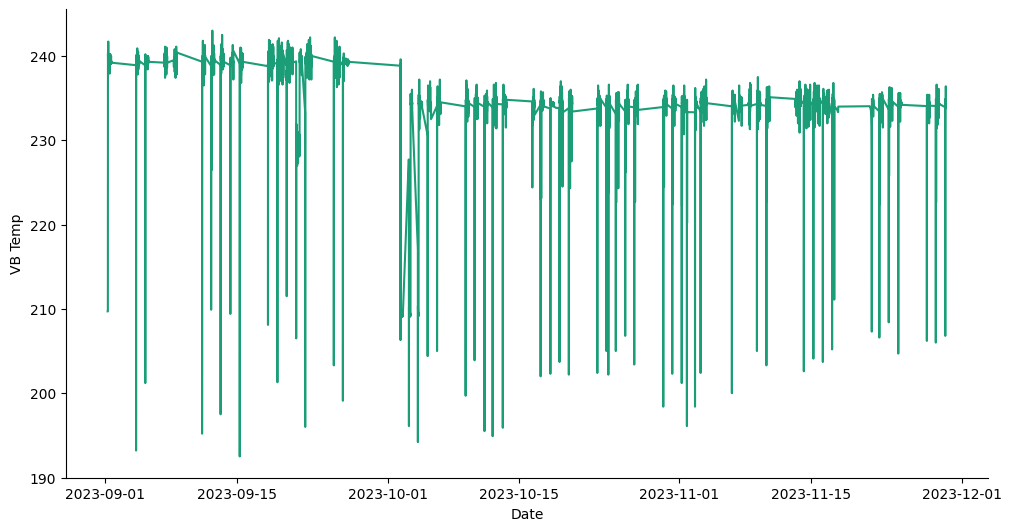

In [ ]:
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['suhu_sealing_vertical_bawah']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('datetime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('VB Temp')

## Data Preparation

In [ ]:
# Separate data into training and validation sets
train_vbtemp = data.iloc[:7222]
test_vbtemp = data.iloc[7222:]

# Display information or dimensions of the training and validation sets
print("Number of training data:", len(train_vbtemp))
print("Number of testing data:", len(test_vbtemp))

Number of training data: 7222
Number of testing data: 400


In [ ]:
# Print validation data
train_vbtemp.head()
train_vbtemp.shape
print(train_vbtemp)

                datetime  suhu_sealing_vertical_bawah
0    2023-09-01 06:29:25                        209.7
1    2023-09-01 06:31:14                        209.7
2    2023-09-01 06:36:14                        209.7
3    2023-09-01 06:41:14                        209.7
4    2023-09-01 06:46:14                        209.7
...                  ...                          ...
7217 2023-11-23 09:56:58                        234.1
7218 2023-11-23 10:01:58                        234.3
7219 2023-11-23 10:06:58                        234.4
7220 2023-11-23 10:11:58                        234.4
7221 2023-11-23 10:16:58                        234.2

[7222 rows x 2 columns]


In [ ]:
test_vbtemp.head()
test_vbtemp.shape
print(test_vbtemp )

                datetime  suhu_sealing_vertical_bawah
7222 2023-11-23 10:21:58                        234.2
7223 2023-11-23 10:26:58                        234.4
7224 2023-11-23 10:31:58                        234.4
7225 2023-11-23 10:36:58                        234.1
7226 2023-11-23 10:41:58                        234.2
...                  ...                          ...
7617 2023-11-29 07:38:19                        233.9
7618 2023-11-29 07:43:19                        234.2
7619 2023-11-29 07:48:19                        234.5
7620 2023-11-29 07:53:19                        234.4
7621 2023-11-29 07:58:19                        234.4

[400 rows x 2 columns]


## Model Training

In [ ]:
# Inisialisasi model Prophet
model = Prophet(changepoint_prior_scale=0.1, daily_seasonality=True)

# Rename columns for consistency
train_vbtemp = train_vbtemp.rename(columns={'datetime': 'ds', 'suhu_sealing_vertical_bawah': 'y'})
test_vbtemp = test_vbtemp.rename(columns={'datetime': 'ds', 'suhu_sealing_vertical_bawah': 'y'})

# Fit model dengan data training
model.fit(train_vbtemp)


# create dataframe for the same time range as validation/testing data
future_df = pd.DataFrame({'ds': test_vbtemp['ds']})




INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppvykv0s7/lwd74qw1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppvykv0s7/11h4gaod.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23895', 'data', 'file=/tmp/tmppvykv0s7/lwd74qw1.json', 'init=/tmp/tmppvykv0s7/11h4gaod.json', 'output', 'file=/tmp/tmppvykv0s7/prophet_modeleby_o20v/prophet_model-20240416055637.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:56:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:56:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


## Model Testing

In [ ]:
# Perform prediction for the same time range as the validation data

forecast_validation = model.predict(future_df)
print(forecast_validation)

                     ds       trend  yhat_lower  yhat_upper  trend_lower  \
0   2023-11-23 10:21:58  233.340954  228.133000  239.328207   233.340954   
1   2023-11-23 10:26:58  233.340756  228.048163  239.439739   233.340756   
2   2023-11-23 10:31:58  233.340559  228.065855  238.949849   233.340559   
3   2023-11-23 10:36:58  233.340361  227.880246  239.348731   233.340361   
4   2023-11-23 10:41:58  233.340164  227.962104  239.200686   233.340164   
..                  ...         ...         ...         ...          ...   
395 2023-11-29 07:38:19  233.005971  223.234348  243.624336   224.482719   
396 2023-11-29 07:43:19  233.005773  223.211466  243.657747   224.460892   
397 2023-11-29 07:48:19  233.005576  222.863857  243.668245   224.409398   
398 2023-11-29 07:53:19  233.005378  223.096703  243.800090   224.359209   
399 2023-11-29 07:58:19  233.005180  223.125485  243.679055   224.304310   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0     2

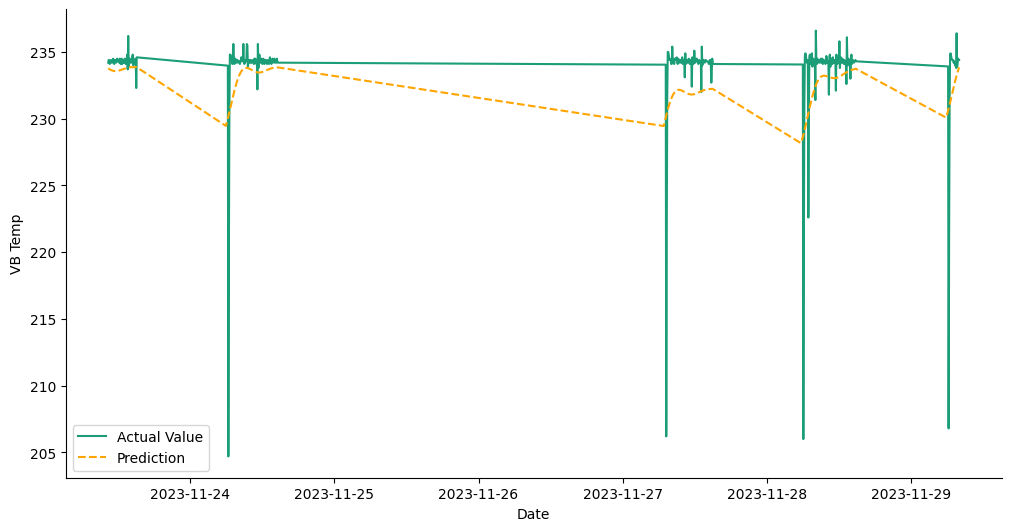

In [ ]:
# Function to plot a series
def _plot_series(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['ds']
    ys = series['y']

    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 5.2), constrained_layout=True)  # Use constrained_layout instead of layout

# Sort the data by 'Date'
df_sorted = test_vbtemp.sort_values('ds', ascending=True)

# Plot the original series
_plot_series(df_sorted, 'Actual Value')

# Plot the forecast series
forecast_validation['ds'] = pd.to_datetime(forecast_validation['ds'])
forecast_validation['ds'] = forecast_validation['ds']
plt.plot((forecast_validation['ds']), forecast_validation['yhat'], label='Prediction', linestyle='dashed', color='orange')

# Customize the plot
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
plt.ylabel('VB Temp')

# Add legend
plt.legend()

# Show the plot
plt.show()


## Metrics Evaluation for Data Testing

In [ ]:
actual_values_validation = test_vbtemp['y']
forecasted_values_training = forecast_validation['yhat'][:len(test_vbtemp)]
actual = actual_values_validation.reset_index(drop=True)
predicted = forecasted_values_training.reset_index(drop=True)

def mape(actual, predicted):
    diffs = abs(actual - predicted)
    ratios = diffs / actual
    mape_val = 100 * ratios.mean()
    return mape_val

mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)
mape_val = mape(actual, predicted)

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('MAPE:', mape_val)

MAE: 1.9598268955161442
MSE: 10.994240106703414
RMSE: 3.315756340068343
MAPE: 0.8534926634339711


## Forecast for the Next 24 Hours

In [ ]:

# Creating a DataFrame for 24-hour ahead predictions with a 5-minute interval
future_dates = pd.date_range(start=test_vbtemp['ds'].iloc[-1],
                              end=test_vbtemp['ds'].iloc[-1] + timedelta(hours=24),
                              freq='5min')
future_df = pd.DataFrame({'ds': future_dates})

# Perform predictions for the next 24 hours
forecast_future = model.predict(future_df)
forecast_future.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-11-29 07:58:19,233.005180,228.622593,239.572166,233.005180,233.005180,0.846679,0.846679,0.846679,-0.578901,-0.578901,-0.578901,1.425579,1.425579,1.425579,0.0,0.0,0.0,233.851859
1,2023-11-29 08:03:19,233.004983,228.366219,239.538325,233.004983,233.004983,0.946980,0.946980,0.946980,-0.479242,-0.479242,-0.479242,1.426222,1.426222,1.426222,0.0,0.0,0.0,233.951963
2,2023-11-29 08:08:19,233.004785,228.564416,239.587988,233.004785,233.004785,1.040190,1.040190,1.040190,-0.386630,-0.386630,-0.386630,1.426820,1.426820,1.426820,0.0,0.0,0.0,234.044976
3,2023-11-29 08:13:19,233.004588,228.218221,239.870356,233.004588,233.004588,1.126228,1.126228,1.126228,-0.301146,-0.301146,-0.301146,1.427374,1.427374,1.427374,0.0,0.0,0.0,234.130816
4,2023-11-29 08:18:19,233.004390,228.776142,239.396640,233.004390,233.004390,1.205058,1.205058,1.205058,-0.222826,-0.222826,-0.222826,1.427884,1.427884,1.427884,0.0,0.0,0.0,234.209448


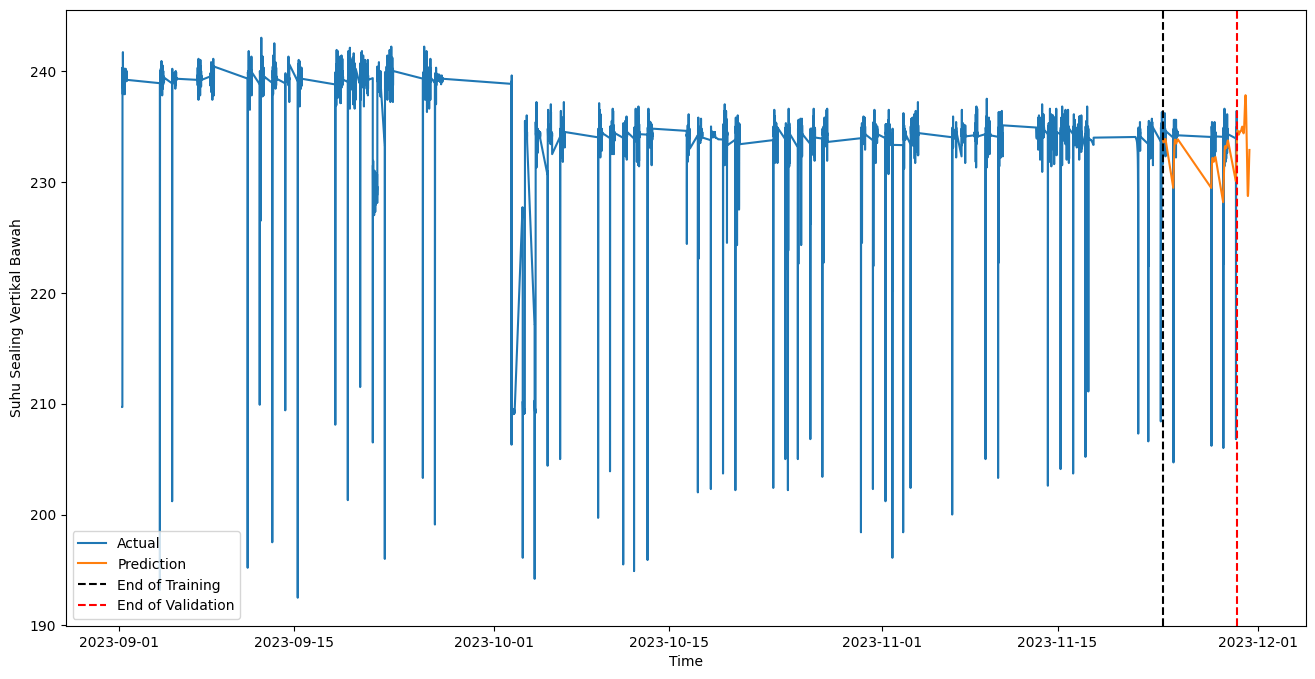

In [ ]:
# Combining Actual, Validation, and Prediction Data for Visualization
full_data = pd.concat([train_vbtemp.rename(columns={'y': 'actual'}),
                       test_vbtemp.rename(columns={'y': 'actual'}),
                       forecast_validation.rename(columns={'yhat': 'predicted'}),
                       forecast_future[['ds', 'yhat']].rename(columns={'yhat': 'predicted'})], ignore_index=True)

# Create a plot for actual, validation, and prediction data
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(full_data['ds'], full_data['actual'], label='Actual')
ax.plot(full_data['ds'], full_data['predicted'], label='Prediction')

# Add vertical lines to distinguish training, validation, and prediction data
train_end = train_vbtemp['ds'].iloc[-1]
validation_end = test_vbtemp['ds'].iloc[-1]
ax.axvline(train_end, color='k', linestyle='--', label='End of Training')
ax.axvline(validation_end, color='r', linestyle='--', label='End of Validation')

ax.set_xlabel('Time')
ax.set_ylabel('Suhu Sealing Vertikal Bawah')
ax.legend()
plt.show()


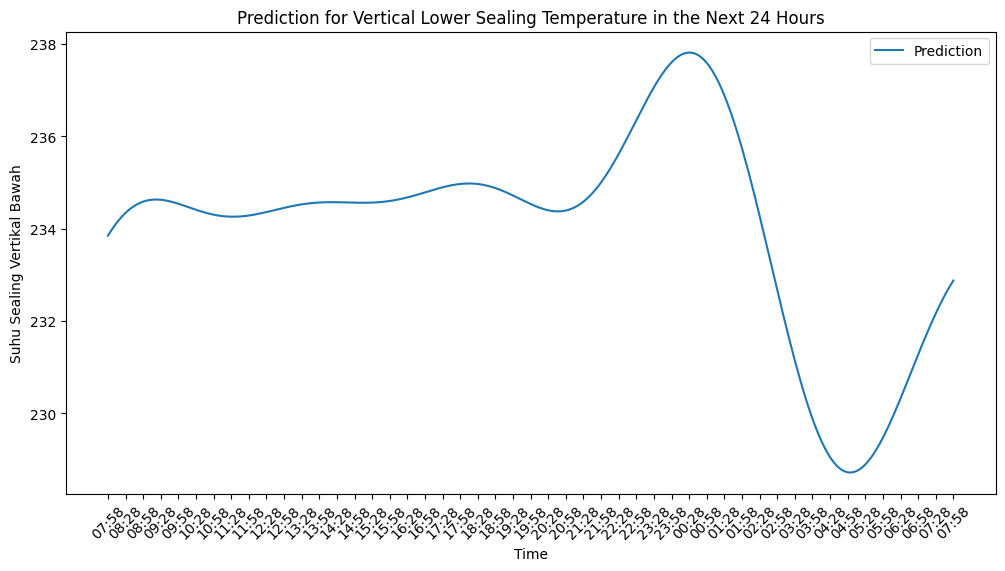

In [ ]:
# Creating a Plot for Prediction Results Only
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(forecast_future['ds'], forecast_future['yhat'], label='Prediction')

# Add labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Suhu Sealing Vertikal Bawah')
ax.set_title('Prediction for Vertical Lower Sealing Temperature in the Next 24 Hours')
ax.legend()

# Set x-axis ticks at 30-minute intervals
ax.set_xticks(forecast_future['ds'][::6])
ax.set_xticklabels(forecast_future['ds'].dt.strftime('%H:%M')[::6], rotation=45)

plt.show()


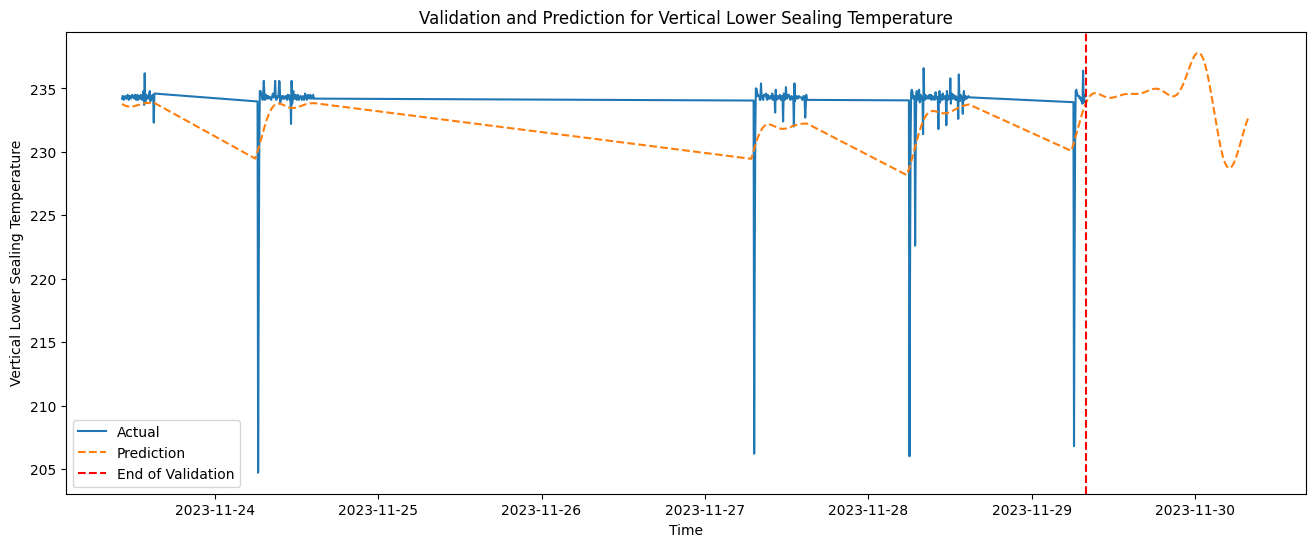

In [ ]:
# Combining Validation and 24-Hour Ahead Prediction Data
combined_data = pd.concat([test_vbtemp.rename(columns={'y': 'actual'}),
                           forecast_validation.rename(columns={'yhat': 'predicted'}),
                           forecast_future[['ds', 'yhat']].rename(columns={'yhat': 'predicted'})], ignore_index=True)

# Create a plot for validation and prediction data
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(combined_data['ds'], combined_data['actual'], label='Actual')
ax.plot(combined_data['ds'], combined_data['predicted'], label='Prediction', linestyle='--')

# Add a vertical line to distinguish validation and prediction data
validation_end = test_vbtemp['ds'].iloc[-1]
ax.axvline(validation_end, color='r', linestyle='--', label='End of Validation')

# Add labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Vertical Lower Sealing Temperature')
ax.set_title('Validation and Prediction for Vertical Lower Sealing Temperature')
ax.legend()

plt.show()


## Print Temperature Prediction

In [ ]:
# Prediction results i table
forecast_future_table = forecast_future[['ds', 'yhat']].rename(columns={'ds': 'Waktu', 'yhat': 'Prediksi Suhu'})
forecast_future_table.set_index('Waktu', inplace=True)
print(forecast_future_table)

                     Prediksi Suhu
Waktu                             
2023-11-29 07:58:19     233.851859
2023-11-29 08:03:19     233.951963
2023-11-29 08:08:19     234.044976
2023-11-29 08:13:19     234.130816
2023-11-29 08:18:19     234.209448
...                            ...
2023-11-30 07:38:19     232.428760
2023-11-30 07:43:19     232.550966
2023-11-30 07:48:19     232.666950
2023-11-30 07:53:19     232.776438
2023-11-30 07:58:19     232.879206

[289 rows x 1 columns]


# Suhu Sealing Vertikal Atas

## Load Data

In [ ]:
# Load data from csv file

file_path = "/content/drive/MyDrive/data_mean187window_vatemp.csv"

datatas = pd.read_csv(file_path)

datatas.head()

,datetime,suhu_sealing_vertical_atas
0,2023-09-01 06:29:25,198.8
1,2023-09-01 06:31:14,198.8
2,2023-09-01 06:36:14,198.8
3,2023-09-01 06:41:14,198.8
4,2023-09-01 06:46:14,198.8


In [ ]:
datatas['datetime'] = pd.to_datetime(datatas['datetime']) #Baris kode ini digunakan untuk mengonversi kolom dengan nama 'times' dalam DataFrame data menjadi tipe data datetime menggunakan fungsi pd.to_datetime

In [ ]:
print("Rows and Columns = ", datatas.shape) #Ini memberikan informasi tentang ukuran (dimensi) DataFrame df.

Rows and Columns =  (7622, 2)


## Suhu Sealing Vertical Atas Visualization

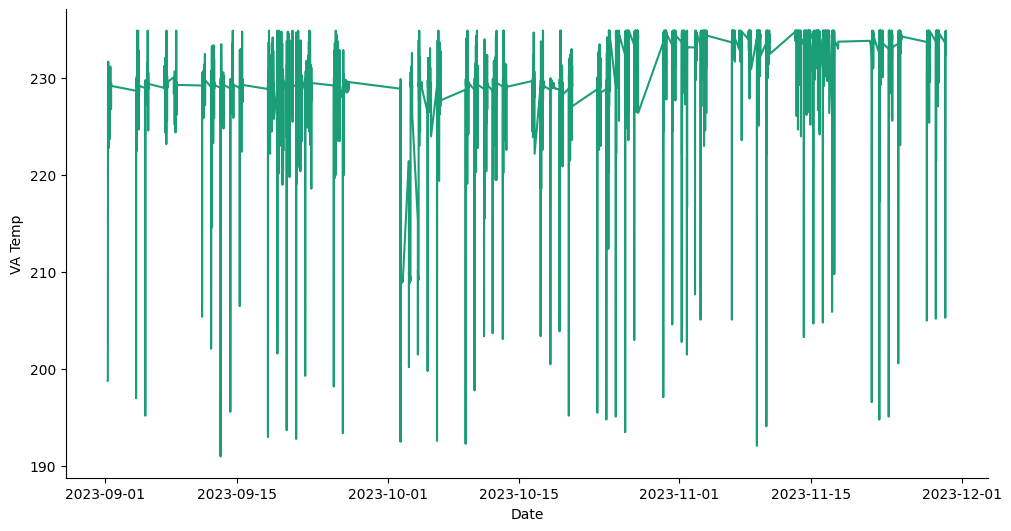

In [ ]:
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['datetime']
  ys = series['suhu_sealing_vertical_atas']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = datatas.sort_values('datetime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('VA Temp')

## Data Preparation

In [ ]:
# Separate data into training and validation sets
train_vatemp = datatas.iloc[:7222]
test_vatemp = datatas.iloc[7222:]

# Display information or dimensions of the training and validation sets
print("Jumlah data training:", len(train_vatemp ))
print("Jumlah data testing:", len(test_vatemp))

Jumlah data training: 7222
Jumlah data testing: 400


## Model Training

In [ ]:
# Inisialisasi model Prophet
model = Prophet(changepoint_prior_scale=0.1, daily_seasonality=True)

# Rename columns for consistency
train_vatemp = train_vatemp.rename(columns={'datetime': 'ds', 'suhu_sealing_vertical_atas': 'y'})
test_vatemp = test_vatemp.rename(columns={'datetime': 'ds', 'suhu_sealing_vertical_atas': 'y'})

# Fit model dengan data training
model.fit(train_vatemp)


# Buat dataframe untuk rentang waktu yang sama dengan validation data
future_va = pd.DataFrame({'ds': test_vatemp['ds']})


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppvykv0s7/s_cggs48.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppvykv0s7/n1_rkrjp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79657', 'data', 'file=/tmp/tmppvykv0s7/s_cggs48.json', 'init=/tmp/tmppvykv0s7/n1_rkrjp.json', 'output', 'file=/tmp/tmppvykv0s7/prophet_model7kbr3cw_/prophet_model-20240416060229.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:02:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:02:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


## Model Testing

In [ ]:
# Perform prediction for the same time range as the validation data
forecast_test = model.predict(future_va)


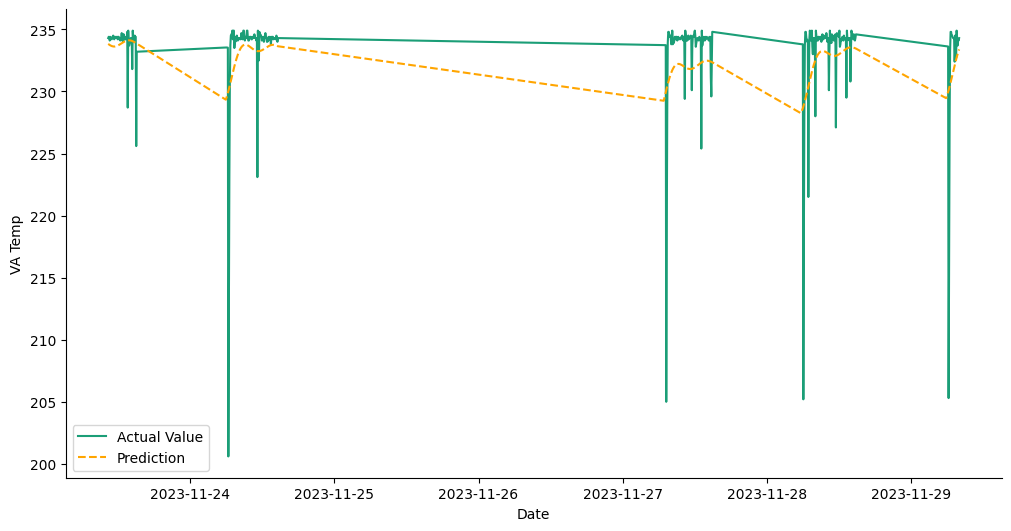

In [ ]:
# Function to plot a series
def _plot_series(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['ds']
    ys = series['y']

    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 5.2), constrained_layout=True)  # Use constrained_layout instead of layout

# Sort the data by 'Date'
df_sorted = test_vatemp.sort_values('ds', ascending=True)

# Plot the original series
_plot_series(df_sorted, 'Actual Value')

# Plot the forecast series
forecast_test['ds'] = pd.to_datetime(forecast_test['ds'])
forecast_test['ds'] = forecast_test['ds']
plt.plot((forecast_test['ds']), forecast_test['yhat'], label='Prediction', linestyle='dashed', color='orange')

# Customize the plot
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
plt.ylabel('VA Temp')

# Add legend
plt.legend()

# Show the plot
plt.show()


## Metrics Evaluation for Data Testing

In [ ]:
actual_values_test = test_vatemp['y']
forecasted_values_training = forecast_test['yhat'][:len(test_vatemp)]
actual = actual_values_test.reset_index(drop=True)
predicted = forecasted_values_training.reset_index(drop=True)

def mape(actual, predicted):
    diffs = abs(actual - predicted)
    ratios = diffs / actual
    mape_val = 100 * ratios.mean()
    return mape_val

mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)
mape_val = mape(actual, predicted)

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('MAPE:', mape_val)



MAE: 2.096660854258561
MSE: 13.402956257238811
RMSE: 3.6610048152438712
MAPE: 0.9191813607656107


## Forecast for the Next 24 Hours

In [ ]:
# Creating a DataFrame for 24-hour ahead predictions with a 5-minute interval
future_dates = pd.date_range(start=test_vatemp['ds'].iloc[-1],
                              end=test_vatemp['ds'].iloc[-1] + timedelta(hours=24),
                              freq='5min')
future_df = pd.DataFrame({'ds': future_dates})

# Perform predictions for the next 24 hours
forecast_future = model.predict(future_df)
forecast_future.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-11-29 07:58:19,232.593144,228.278651,238.489066,232.593144,232.593144,0.794494,0.794494,0.794494,-0.380703,-0.380703,-0.380703,1.175197,1.175197,1.175197,0.0,0.0,0.0,233.387638
1,2023-11-29 08:03:19,232.592961,228.287662,238.356469,232.592961,232.592961,0.903242,0.903242,0.903242,-0.273542,-0.273542,-0.273542,1.176784,1.176784,1.176784,0.0,0.0,0.0,233.496202
2,2023-11-29 08:08:19,232.592777,228.340735,238.690513,232.592777,232.592777,1.003941,1.003941,1.003941,-0.174408,-0.174408,-0.174408,1.178349,1.178349,1.178349,0.0,0.0,0.0,233.596719
3,2023-11-29 08:13:19,232.592594,228.542665,238.575377,232.592594,232.592594,1.096451,1.096451,1.096451,-0.083443,-0.083443,-0.083443,1.179893,1.179893,1.179893,0.0,0.0,0.0,233.689045
4,2023-11-29 08:18:19,232.592410,229.000367,238.598824,232.592410,232.592410,1.180686,1.180686,1.180686,-0.000730,-0.000730,-0.000730,1.181416,1.181416,1.181416,0.0,0.0,0.0,233.773096


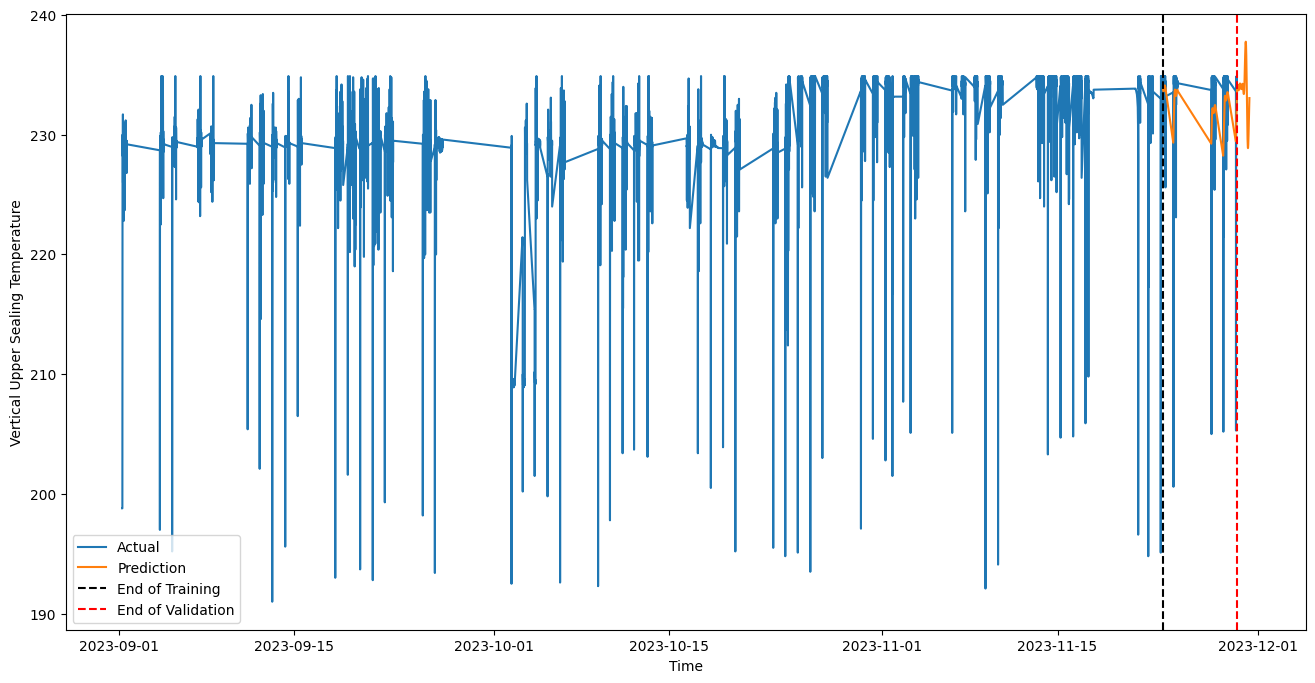

In [ ]:
# Combining Actual, Validation, and Prediction Data for Visualization
full_data = pd.concat([train_vatemp.rename(columns={'y': 'actual'}),
                       test_vatemp.rename(columns={'y': 'actual'}),
                       forecast_test.rename(columns={'yhat': 'predicted'}),
                       forecast_future[['ds', 'yhat']].rename(columns={'yhat': 'predicted'})], ignore_index=True)

# Create a plot for actual, validation, and prediction data
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(full_data['ds'], full_data['actual'], label='Actual')
ax.plot(full_data['ds'], full_data['predicted'], label='Prediction')

# Add vertical lines to distinguish training, validation, and prediction data
train_end = train_vbtemp['ds'].iloc[-1]
validation_end = test_vbtemp['ds'].iloc[-1]
ax.axvline(train_end, color='k', linestyle='--', label='End of Training')
ax.axvline(validation_end, color='r', linestyle='--', label='End of Validation')

ax.set_xlabel('Time')
ax.set_ylabel('Vertical Upper Sealing Temperature')
ax.legend()
plt.show()


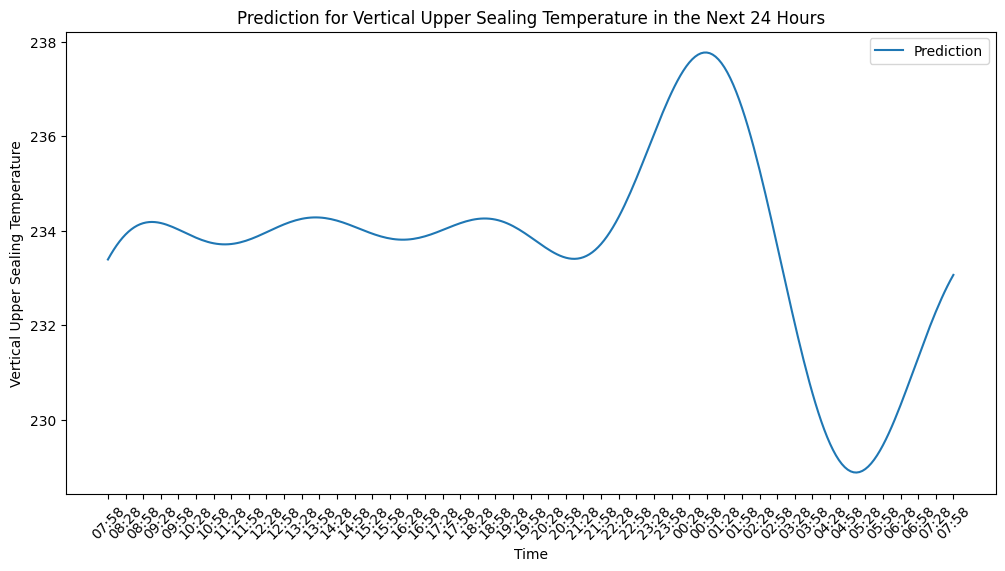

In [ ]:
# Creating a Plot for Prediction Results Only
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(forecast_future['ds'], forecast_future['yhat'], label='Prediction')

# Add labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Vertical Upper Sealing Temperature')
ax.set_title('Prediction for Vertical Upper Sealing Temperature in the Next 24 Hours')
ax.legend()

# Set x-axis ticks at 30-minute intervals
ax.set_xticks(forecast_future['ds'][::6])
ax.set_xticklabels(forecast_future['ds'].dt.strftime('%H:%M')[::6], rotation=45)

plt.show()


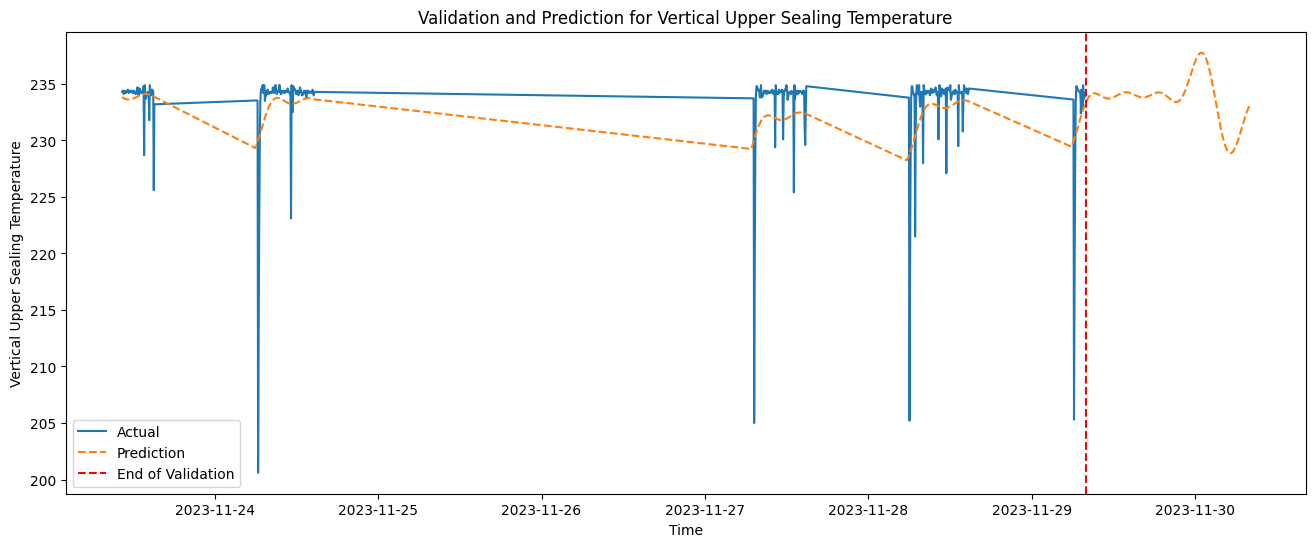

In [ ]:
# Combining Validation and 24-Hour Ahead Prediction Data
combined_data = pd.concat([test_vatemp.rename(columns={'y': 'actual'}),
                           forecast_test.rename(columns={'yhat': 'predicted'}),
                           forecast_future[['ds', 'yhat']].rename(columns={'yhat': 'predicted'})], ignore_index=True)

# Create a plot for validation and prediction data
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(combined_data['ds'], combined_data['actual'], label='Actual')
ax.plot(combined_data['ds'], combined_data['predicted'], label='Prediction', linestyle='--')

# Add a vertical line to distinguish validation and prediction data
validation_end = test_vatemp['ds'].iloc[-1]
ax.axvline(validation_end, color='r', linestyle='--', label='End of Validation')

# Add labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Vertical Upper Sealing Temperature')
ax.set_title('Validation and Prediction for Vertical Upper Sealing Temperature')
ax.legend()

plt.show()


## Print Temperature Prediction

In [ ]:
## Prediction results i table
forecast_future_table = forecast_future[['ds', 'yhat']].rename(columns={'ds': 'Waktu', 'yhat': 'Prediksi Suhu'})
forecast_future_table.set_index('Waktu', inplace=True)
print(forecast_future_table)

                     Prediksi Suhu
Waktu                             
2023-11-29 07:58:19     233.387638
2023-11-29 08:03:19     233.496202
2023-11-29 08:08:19     233.596719
2023-11-29 08:13:19     233.689045
2023-11-29 08:18:19     233.773096
...                            ...
2023-11-30 07:38:19     232.566851
2023-11-30 07:43:19     232.701101
2023-11-30 07:48:19     232.828495
2023-11-30 07:53:19     232.948653
2023-11-30 07:58:19     233.061252

[289 rows x 1 columns]
